# Análise exploratória de dados

### __[Quais alunos vão abandonar o curso superior?](https://www.dato.ai/competitions/5)__
#### Competição criada pela __[Dato](https://www.dato.ai/)__

"A evasão no ensino superior representa um enorme desafio para o Brasil. Todos os anos, mais de 20% dos alunos matriculados abandonam os seus cursos. Esse comportamento impõe perdas às instituições de ensino superior (IES), tanto públicas como privadas.

De acordo com o Censo da Educação Superior divulgado pelo MEC (Ministério da Educação), 8 milhões de estudantes estão matriculados no ensino superior, sendo 75% deles em instituições privadas. Além disso, a concentração das matículas é alta entre as 197 instituições que são credenciadas como universidades. Elas representam apenas 8,2% das IES, mas possuem 53,7% dos alunos de gradução.

Nessa competição, seu desafio é prever quem vai abandonar o curso superior nos dois primeiros anos, quando o problema da evasão é mais intenso. Você terá a sua disposição informações sobre as IES, sobre os cursos e sobre os alunos. Todos esses dados foram retirados do Censo da Educação Superior."

Os dados podem ser baixados __[aqui](https://www.dato.ai/data/dea203aa-36ad-466b-b984-a656f89384e2)__

## Recursos necessários

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py

from cycler import cycler
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

## Funções

In [2]:
# Função criada para criação e exibição de gráficos
def gerar_grafico(f, title):
    labels = []
    sizes = []
    fig = None
    colors = plt.cm.gray(np.linspace(0.2,0.8,4))
    
    for row in f:
        labels.append(row[0])
        sizes.append(row[1])

    if(len(labels) > 2):
        y_pos = np.arange(len(labels))
        plt.bar(y_pos, sizes, align='center', alpha=0.5, color='purple')
        plt.xticks(y_pos, labels, rotation=90)
        plt.ylabel('Quantidade de alunos')
    else:
        plt.rcParams['axes.prop_cycle'] = cycler(color=colors)
        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, autopct='%1.1f%%',
            shadow=True, startangle=90)
        ax1.axis('equal')
        plt.legend(labels, loc="best")       
        
    plt.title(title, size=16)
    plt.show()
    
    
# Função que agrupa valores
def agrupa_valores(campos):
    valores = []
    a = 0
    
    for campo in campos:
        c = []
        c.append(campo[1])
        c.append(df.filter(df[campo[0]] == 1).count())
        a+=df.filter(df[campo[0]] == 1).count()
        valores.append(c)

    return valores, a 


# Função usada para delimitar saídas de informações
def separador():
    print("\n--------------------------------------------------")

## Leitura dos dados

In [3]:
spark = SparkSession.builder.appName("EvasaoUniDATO").getOrCreate()

In [4]:
# Leitura dos dados em formato csv usando Spark

df = spark.read.csv("x_train.csv", header=True)
#df = spark.read.format("csv").option("header","true").option("mode","DROPMALFORMED").load("x_train.csv")

In [5]:
# Salvando os dados em formato parquet
df.write.parquet("dados/v1")

# Leitura dos dados em formato parquet usando Spark
df = spark.read.parquet("dados/v1")

# Registra uma tabela temporária dos dados lidos
df.registerTempTable("dados")

## Os dados

In [6]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- index: string (nullable = true)
 |-- CO_IES: string (nullable = true)
 |-- NO_IES: string (nullable = true)
 |-- CO_CATEGORIA_ADMINISTRATIVA: string (nullable = true)
 |-- DS_CATEGORIA_ADMINISTRATIVA: string (nullable = true)
 |-- CO_ORGANIZACAO_ACADEMICA: string (nullable = true)
 |-- DS_ORGANIZACAO_ACADEMICA: string (nullable = true)
 |-- CO_CURSO: string (nullable = true)
 |-- NO_CURSO: string (nullable = true)
 |-- CO_CURSO_POLO: string (nullable = true)
 |-- CO_TURNO_ALUNO: string (nullable = true)
 |-- DS_TURNO_ALUNO: string (nullable = true)
 |-- CO_GRAU_ACADEMICO: string (nullable = true)
 |-- DS_GRAU_ACADEMICO: string (nullable = true)
 |-- CO_MODALIDADE_ENSINO: string (nullable = true)
 |-- DS_MODALIDADE_ENSINO: string (nullable = true)
 |-- CO_NIVEL_ACADEMICO: string (nullable = true)
 |-- DS_NIVEL_ACADEMICO: string (nullable = true)
 |-- CO_OCDE: string (nullable = true)
 |-- NO_OCDE: string (nullable = true)
 |-- CO_OCDE_AREA_GE

In [7]:
# Total de linhas 
df.count()

1168973

In [8]:
# Total de colunas
len(df.columns)

116

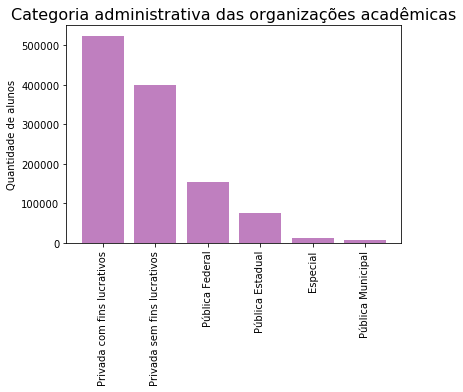

In [9]:
# Categoria administrativa das organizações acadêmicas

gerar_grafico(df.groupBy("DS_CATEGORIA_ADMINISTRATIVA").count().orderBy("count",  ascending=False).collect(),
              "Categoria administrativa das organizações acadêmicas")

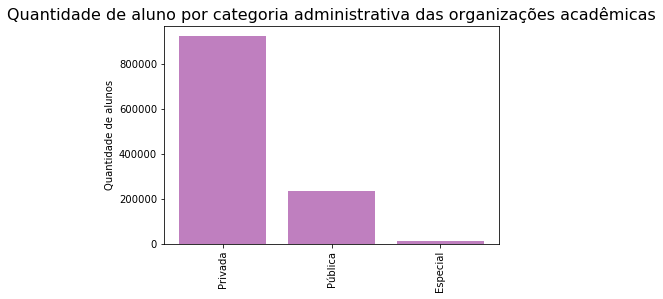

In [10]:
# Categoria administrativa das organizações acadêmicas

publica = spark.sql("select count(_c0) from dados where (CO_CATEGORIA_ADMINISTRATIVA=1 or \
          CO_CATEGORIA_ADMINISTRATIVA=2 or CO_CATEGORIA_ADMINISTRATIVA=3)").collect()[0][0]
privada = spark.sql("select count(_c0) from dados where (CO_CATEGORIA_ADMINISTRATIVA=4 or \
          CO_CATEGORIA_ADMINISTRATIVA=5)").collect()[0][0]
especial = spark.sql("select count(_c0) from dados where CO_CATEGORIA_ADMINISTRATIVA=7").collect()[0][0]

dados = [['Privada', privada], ['Pública', publica], ['Especial', especial]]
gerar_grafico(dados, "Quantidade de aluno por categoria administrativa das organizações acadêmicas")


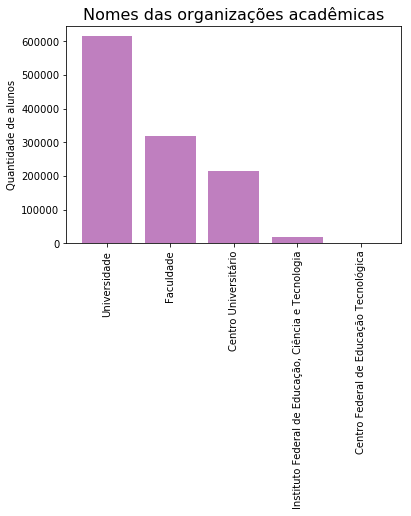

In [11]:
# Nomes das organizações acadêmicas

gerar_grafico(df.groupBy("DS_ORGANIZACAO_ACADEMICA").count().orderBy("count",  ascending=False).collect(), 
              "Nomes das organizações acadêmicas")

+------------------------------------+-----------+
|NO_OCDE_AREA_GERAL                  |Qtde_Alunos|
+------------------------------------+-----------+
|Ciências sociais, negócios e direito|438035     |
|Educação                            |216497     |
|Engenharia, produção e construção   |191084     |
|Saúde e bem estar social            |178003     |
|Ciências, matemática e computação   |67867      |
|Agricultura e veterinária           |30694      |
|Humanidades e artes                 |22986      |
|Serviços                            |19861      |
|null                                |0          |
+------------------------------------+-----------+



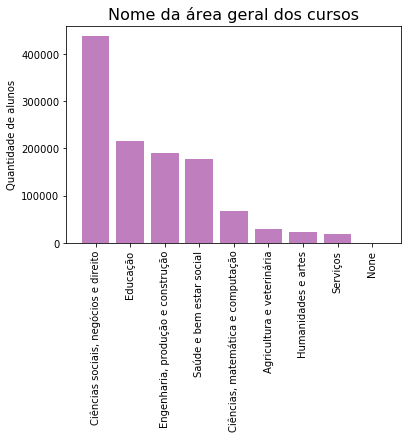

In [12]:
# Nome da área geral dos cursos

alunos_area = df.groupBy("NO_OCDE_AREA_GERAL").agg(
    F.count("NO_OCDE_AREA_GERAL").alias('Qtde_Alunos')).orderBy("Qtde_Alunos",  ascending=False)

alunos_area.show(truncate=False)

gerar_grafico(alunos_area.collect(), "Nome da área geral dos cursos")

In [13]:
# Quantidade de alunas e alunos divididos pela área geral dos cursos

df.crosstab("NO_OCDE_AREA_GERAL", "DS_SEXO_ALUNO").orderBy("Feminino",  ascending=False).show(truncate=False)

+------------------------------------+--------+---------+
|NO_OCDE_AREA_GERAL_DS_SEXO_ALUNO    |Feminino|Masculino|
+------------------------------------+--------+---------+
|Ciências sociais, negócios e direito|254982  |183053   |
|Educação                            |152777  |63720    |
|Saúde e bem estar social            |134944  |43059    |
|Engenharia, produção e construção   |62931   |128153   |
|Ciências, matemática e computação   |21829   |46038    |
|Agricultura e veterinária           |15391   |15303    |
|Humanidades e artes                 |12305   |10681    |
|Serviços                            |11962   |7899     |
|null                                |1991    |1955     |
+------------------------------------+--------+---------+



In [14]:
print("Quantidade de cursos existentes nos dados:", df.select("NO_IES").distinct().count())

Quantidade de cursos existentes nos dados: 2195


+-----------------------+-----------+
|NO_CURSO               |Qtde_Alunos|
+-----------------------+-----------+
|DIREITO                |117274     |
|ADMINISTRAÇÃO          |115308     |
|PEDAGOGIA              |95100      |
|ENGENHARIA CIVIL       |57240      |
|CIÊNCIAS CONTÁBEIS     |54824      |
|EDUCAÇÃO FÍSICA        |45935      |
|ENFERMAGEM             |40753      |
|PSICOLOGIA             |36634      |
|ARQUITETURA E URBANISMO|26211      |
|SERVIÇO SOCIAL         |25658      |
+-----------------------+-----------+
only showing top 10 rows



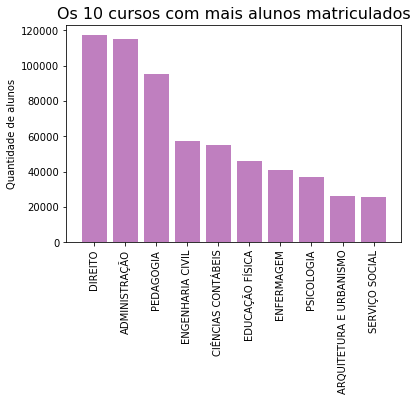

In [15]:
# Os 10 cursos com mais alunos matriculados

cursos = df.groupBy("NO_CURSO").agg(
    F.count("NO_CURSO").alias('Qtde_Alunos')).orderBy("Qtde_Alunos",  ascending=False)

cursos.show(10, truncate=False)

gerar_grafico(cursos.collect()[0:10], "Os 10 cursos com mais alunos matriculados")

+--------------------+-----------+
|DS_MODALIDADE_ENSINO|Qtde_Alunos|
+--------------------+-----------+
|Presencial          |954416     |
|Curso a distância   |214557     |
+--------------------+-----------+



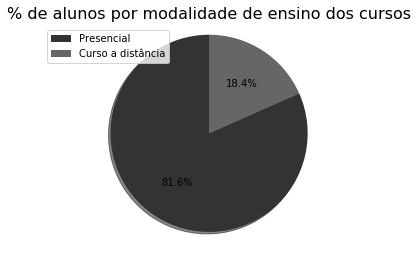

In [16]:
# Modalidade de ensino dos cursos

mod_ensino = df.groupBy("DS_MODALIDADE_ENSINO").agg(
    F.count("DS_MODALIDADE_ENSINO").alias('Qtde_Alunos')).orderBy("Qtde_Alunos",  ascending=False)
mod_ensino.show(truncate=False)

gerar_grafico(mod_ensino.collect(), "% de alunos por modalidade de ensino dos cursos")

In [17]:
# Quantidade de alunos cursando cursos EAD e presenciais divididos pela categoria administrativa das instituições

df.crosstab("DS_CATEGORIA_ADMINISTRATIVA", "DS_MODALIDADE_ENSINO").show(truncate=False)

+------------------------------------------------+-----------------+----------+
|DS_CATEGORIA_ADMINISTRATIVA_DS_MODALIDADE_ENSINO|Curso a distância|Presencial|
+------------------------------------------------+-----------------+----------+
|Pública Estadual                                |5459             |69411     |
|Privada sem fins lucrativos                     |45691            |353705    |
|Privada com fins lucrativos                     |145033           |378872    |
|Especial                                        |756              |10345     |
|Pública Federal                                 |17505            |135822    |
|Pública Municipal                               |113              |6261      |
+------------------------------------------------+-----------------+----------+



+--------------+-----------+
|DS_TURNO_ALUNO|Qtde_Alunos|
+--------------+-----------+
|Noturno       |611245     |
|Não aplicável |214557     |
|Matutino      |183917     |
|Integral      |123680     |
|Vespertino    |35574      |
+--------------+-----------+



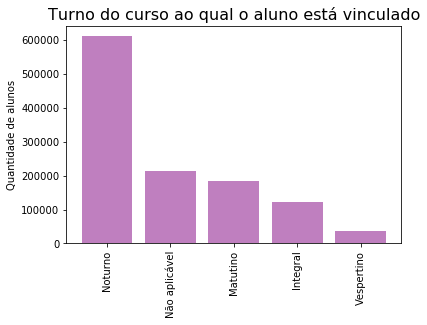

In [18]:
# Turno do curso ao qual o aluno matriculado está vinculado

turno = df.groupBy("DS_TURNO_ALUNO").agg(
    F.count("DS_TURNO_ALUNO").alias('Qtde_Alunos')).orderBy("Qtde_Alunos",  ascending=False)

turno.show(truncate=False)

gerar_grafico(turno.collect(), "Turno do curso ao qual o aluno está vinculado")

+-----------------+-----------+
|DS_GRAU_ACADEMICO|Qtde_Alunos|
+-----------------+-----------+
|      Bacharelado|     822766|
|     Licenciatura|     216085|
|      Tecnológico|     125195|
|    Não aplicável|       4927|
+-----------------+-----------+



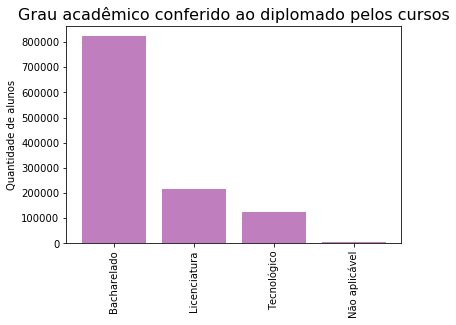

In [19]:
# Grau acadêmico conferido ao diplomado pelos cursos

grau_academico = df.groupBy("DS_GRAU_ACADEMICO").agg(
    F.count("DS_GRAU_ACADEMICO").alias('Qtde_Alunos')).orderBy("Qtde_Alunos",  ascending=False)
grau_academico.show()

gerar_grafico(grau_academico.collect(), "Grau acadêmico conferido ao diplomado pelos cursos")

In [20]:
# 20 Instituições de Ensino com mais alunos matriculados

df.groupBy("NO_IES").agg(
    F.count("NO_IES").alias('Qtde_Alunos')).orderBy("Qtde_Alunos",  ascending=False).show(20, truncate=False)

+---------------------------------------------------------+-----------+
|NO_IES                                                   |Qtde_Alunos|
+---------------------------------------------------------+-----------+
|UNIVERSIDADE PAULISTA                                    |59231      |
|UNIVERSIDADE PITÁGORAS UNOPAR                            |49766      |
|UNIVERSIDADE ESTÁCIO DE SÁ                               |48311      |
|UNIVERSIDADE ANHANGUERA - UNIDERP                        |28659      |
|UNIVERSIDADE NOVE DE JULHO                               |22223      |
|CENTRO UNIVERSITÁRIO INTERNACIONAL                       |18025      |
|CENTRO UNIVERSITÁRIO DAS FACULDADES METROPOLITANAS UNIDAS|9611       |
|CENTRO UNIVERSITÁRIO LEONARDO DA VINCI                   |8414       |
|UNIVERSIDADE ANHEMBI MORUMBI                             |8129       |
|Centro Universitário Estácio do Ceará                    |7748       |
|UNIVERSIDADE DE SÃO PAULO                                |6676 

+-------------+-----------+
|DS_SEXO_ALUNO|Qtde_Alunos|
+-------------+-----------+
|Feminino     |669112     |
|Masculino    |499861     |
+-------------+-----------+



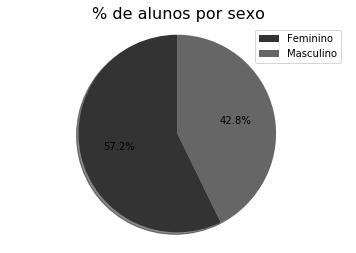

In [21]:
# Quantidade de alunos por sexo

aluno_sexo = df.groupBy("DS_SEXO_ALUNO").agg(
    F.count("DS_SEXO_ALUNO").alias('Qtde_Alunos')).orderBy("Qtde_Alunos",  ascending=False)
aluno_sexo.show(truncate=False)

gerar_grafico(aluno_sexo.collect(), "% de alunos por sexo")

+--------------------------------+-----------+
|DS_COR_RACA_ALUNO               |Qtde_Alunos|
+--------------------------------+-----------+
|Branca                          |446204     |
|Aluno não quis declarar cor/raça|331966     |
|Parda                           |279662     |
|Preta                           |83892      |
|Amarela                         |21506      |
|Indígena                        |5743       |
+--------------------------------+-----------+



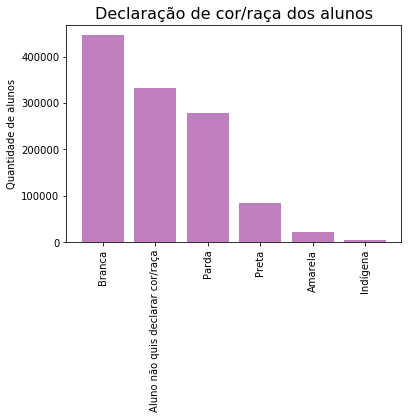

In [22]:
# Quantidade de alunos por raça

alunos_raca = df.groupBy("DS_COR_RACA_ALUNO").agg(
    F.count("DS_COR_RACA_ALUNO").alias('Qtde_Alunos')).orderBy("Qtde_Alunos",  ascending=False)
alunos_raca.show(truncate=False)

gerar_grafico(alunos_raca.collect(), "Declaração de cor/raça dos alunos")

In [23]:
#
#  Destino dos alunos provenientes do ensino médio público e privado
#

# Total de alunos que sairam do ensino médio público e foram para IES privada
privada_pub = spark.sql("select count(_c0) from dados where (CO_CATEGORIA_ADMINISTRATIVA=4 or \
          CO_CATEGORIA_ADMINISTRATIVA=5) and \
          CO_TIPO_ESCOLA_ENS_MEDIO=1").collect()[0][0]
# Total de alunos que sairam do ensino médio publico e foram para IES pública
publica_pub = spark.sql("select count(_c0) from dados where (CO_CATEGORIA_ADMINISTRATIVA=1 or \
          CO_CATEGORIA_ADMINISTRATIVA=2 or CO_CATEGORIA_ADMINISTRATIVA=3) and \
          CO_TIPO_ESCOLA_ENS_MEDIO=1").collect()[0][0]
# Total de alunos que sairam do ensino médio público e foram para IES especial
especial_pub = spark.sql("select count(_c0) from dados where CO_CATEGORIA_ADMINISTRATIVA=7 and \
          CO_TIPO_ESCOLA_ENS_MEDIO=1").collect()[0][0]

# Total de alunos que sairam do ensino médio privado e foram para IES privada
publica_pri = spark.sql("select count(_c0) from dados where (CO_CATEGORIA_ADMINISTRATIVA=4 or \
          CO_CATEGORIA_ADMINISTRATIVA=5) and \
          CO_TIPO_ESCOLA_ENS_MEDIO=0").collect()[0][0]
# Total de alunos que sairam do ensino médio privado e foram para IES pública
privada_pri = spark.sql("select count(_c0) from dados where (CO_CATEGORIA_ADMINISTRATIVA=1 or \
          CO_CATEGORIA_ADMINISTRATIVA=2 or CO_CATEGORIA_ADMINISTRATIVA=3) and \
          CO_TIPO_ESCOLA_ENS_MEDIO=0").collect()[0][0]
# Total de alunos que sairam do ensino médio privado e foram para IES especial
especial_pri = spark.sql("select count(_c0) from dados where CO_CATEGORIA_ADMINISTRATIVA=7 and \
          CO_TIPO_ESCOLA_ENS_MEDIO=0").collect()[0][0]

instituicoes = ["Instituição Superior Pública", "Instituição Superior Privada", "Instituição Superior Especial"]

In [24]:
fig = {"data": [{"values": [publica_pub, privada_pub, especial_pub], "labels": instituicoes, "domain": {"x": [-1, .48]},
                   "hoverinfo":"label+percent+value", "hole": .45, "type": "pie"},     
                {"values": [publica_pri, privada_pri, especial_pri],"labels": instituicoes, "textposition":"inside",
                   "domain": {"x": [.52, 1]}, "hoverinfo":"label+percent+value", "hole": .45, "type": "pie"}],
      "layout": {"title":"Destino dos alunos provenientes de ensino médio público e privado",
                  "annotations": [{"font": {"size": 20}, "showarrow": False, "text": "Ensino médio<br>público",
                                       "x": 0.14, "y": 0.5},
                                  {"font": {"size": 20},"showarrow": False, "text": "Ensino médio<br>privado",
                                       "x": 0.86, "y": 0.5}]}
        }
#py.iplot(fig) -- Imagem abaixo é a representação do gráfico gerado

<img src='graph.png'>

### Natalidade dos alunos por estado
Foram retirados 331123 registros, estes estão definidos como "não informado"

In [25]:
uf_estados = {11: "Rondônia", 12: "Acre", 13: "Amazonas", 14: "Roraima", 15: "Pará",
              16: "Amapá", 17: "Tocantis", 21: "Maranhão", 22: "Piauí", 23: "Ceará",
              24: "Rio Grande do Norte", 25: "Paraíba", 26: "Pernambuco", 27: "Alagoas", 28: "Sergipe",
              29: "Bahia", 31: "Minas Gerais", 32: "Espírito Santo", 33: "Rio de Janeiro", 35: "São Paulo",
              41: "Paraná", 42: "Santa Catarina", 43: "Rio Grande do Sul", 50: "Mato Grosso do Sul", 51: "Mato Grosso",
              52: "Goiás", 53: "Distrito Federal"}

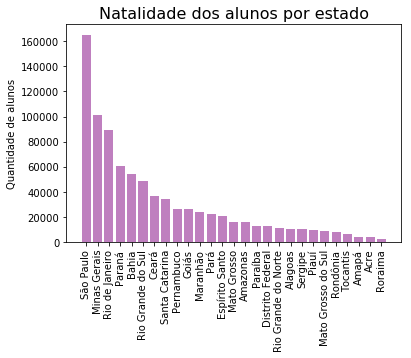

In [26]:
estado_nasc = []

for estado in df.groupBy("CO_UF_NASCIMENTO").count().orderBy("count", ascending=False).collect():
    if estado[0] is None:
        pass
    else:
        estado_nasc.append([uf_estados[int(float(estado[0]))], estado[1]])

gerar_grafico(estado_nasc, "Natalidade dos alunos por estado")

In [27]:
# 10 instituições de ensino com mais alunos nascidos em São Paulo e os 3 cursos de maior procura entre eles

spark.sql("select distinct NO_IES as Instituicao_Ensino, count(NO_IES) as Qtde_Alunos_SP from dados \
        where CO_UF_NASCIMENTO=35 group by NO_IES order by Qtde_Alunos_SP desc").show(10, truncate=False)

spark.sql("select distinct NO_CURSO as Curso, count(NO_CURSO) as Qtde_Alunos_SP from dados \
        where CO_UF_NASCIMENTO=35 group by NO_CURSO order by Qtde_Alunos_SP desc").show(3, truncate=False)

+---------------------------------------------------------+--------------+
|Instituicao_Ensino                                       |Qtde_Alunos_SP|
+---------------------------------------------------------+--------------+
|CENTRO UNIVERSITÁRIO DAS FACULDADES METROPOLITANAS UNIDAS|8233          |
|UNIVERSIDADE ANHEMBI MORUMBI                             |6927          |
|UNIVERSIDADE DE SÃO PAULO                                |5169          |
|UNIVERSIDADE PAULISTA                                    |4845          |
|UNIVERSIDADE SÃO JUDAS TADEU                             |3913          |
|UNIVERSIDADE PRESBITERIANA MACKENZIE                     |3776          |
|UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUITA FILHO   |3735          |
|CENTRO UNIVERSITÁRIO ESTÁCIO DE RIBEIRÃO PRETO           |3478          |
|UNIVERSIDADE PITÁGORAS UNOPAR                            |2614          |
|CENTRO UNIVERSITÁRIO INTERNACIONAL                       |2606          |
+------------------------

In [28]:
# 10 instituições de ensino com mais alunos nascidos em Minas Gerais e os 3 cursos de maior procura entre eles

spark.sql("select distinct NO_IES as Instituicao_Ensino, count(NO_IES) as Qtde_Alunos_MG from dados \
        where CO_UF_NASCIMENTO=31 group by NO_IES order by Qtde_Alunos_MG desc").show(10, truncate=False)

spark.sql("select distinct NO_CURSO as Curso, count(NO_CURSO) as Qtde_Alunos_MG from dados \
        where CO_UF_NASCIMENTO=31 group by NO_CURSO order by Qtde_Alunos_MG desc").show(3, truncate=False)

+------------------------------------------------+--------------+
|Instituicao_Ensino                              |Qtde_Alunos_MG|
+------------------------------------------------+--------------+
|UNIVERSIDADE PITÁGORAS UNOPAR                   |7893          |
|PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS|4850          |
|CENTRO UNIVERSITÁRIO UNA                        |3419          |
|CENTRO UNIVERSITÁRIO DE BELO HORIZONTE          |3262          |
|UNIVERSIDADE ESTÁCIO DE SÁ                      |2493          |
|UNIVERSIDADE DE UBERABA                         |2234          |
|UNIVERSIDADE FEDERAL DE JUIZ DE FORA            |2042          |
|UNIVERSIDADE FEDERAL DE UBERLÂNDIA              |2021          |
|UNIVERSIDADE DO ESTADO DE MINAS GERAIS          |1992          |
|CENTRO UNIVERSITÁRIO INTERNACIONAL              |1804          |
+------------------------------------------------+--------------+
only showing top 10 rows

+-------------+--------------+
|Curso        |Qtde

In [29]:
# 10 instituições de ensino com mais alunos nascidos no Rio de Janeiro e os 3 cursos de maior procura entre eles

spark.sql("select distinct NO_IES as Instituicao_Ensino, count(NO_IES) as Qtde_Alunos_RJ from dados \
        where CO_UF_NASCIMENTO=33 group by NO_IES order by Qtde_Alunos_RJ desc").show(10, truncate=False)

spark.sql("select distinct NO_CURSO as Curso, count(NO_CURSO) as Qtde_Alunos_RJ from dados \
        where CO_UF_NASCIMENTO=33 group by NO_CURSO order by Qtde_Alunos_RJ desc").show(3, truncate=False)

+--------------------------------------------------------+--------------+
|Instituicao_Ensino                                      |Qtde_Alunos_RJ|
+--------------------------------------------------------+--------------+
|UNIVERSIDADE ESTÁCIO DE SÁ                              |33669         |
|UNIVERSIDADE VEIGA DE ALMEIDA                           |5489          |
|UNIVERSIDADE FEDERAL FLUMINENSE                         |5445          |
|UNIVERSIDADE FEDERAL DO RIO DE JANEIRO                  |3998          |
|UNIVERSIDADE DO GRANDE RIO PROFESSOR JOSÉ DE SOUZA HERDY|3103          |
|CENTRO UNIVERSITÁRIO AUGUSTO MOTTA                      |2467          |
|UNIVERSIDADE CÂNDIDO MENDES                             |2127          |
|UNIVERSIDADE PITÁGORAS UNOPAR                           |2033          |
|CENTRO UNIVERSITÁRIO CARIOCA                            |1960          |
|UNIVERSIDADE SALGADO DE OLIVEIRA                        |1916          |
+-------------------------------------

In [30]:
# 10 instituições de ensino com mais alunos nascidos no Paraná e os 3 cursos de maior procura entre eles

spark.sql("select distinct NO_IES as Instituicao_Ensino, count(NO_IES) as Qtde_Alunos_PR from dados \
        where CO_UF_NASCIMENTO=41 group by NO_IES order by Qtde_Alunos_PR desc").show(10, truncate=False)

spark.sql("select distinct NO_CURSO as Curso, count(NO_CURSO) as Qtde_Alunos_PR from dados \
        where CO_UF_NASCIMENTO=41 group by NO_CURSO order by Qtde_Alunos_PR desc").show(3, truncate=False)

+--------------------------------------------+--------------+
|Instituicao_Ensino                          |Qtde_Alunos_PR|
+--------------------------------------------+--------------+
|UNIVERSIDADE PITÁGORAS UNOPAR               |5801          |
|CENTRO UNIVERSITÁRIO INTERNACIONAL          |4044          |
|CENTRO UNIVERSITÁRIO DE MARINGÁ - UNICESUMAR|3509          |
|PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ  |3212          |
|UNIVERSIDADE PARANAENSE                     |2857          |
|UNIVERSIDADE TECNOLÓGICA FEDERAL DO PARANÁ  |2288          |
|UNIVERSIDADE FEDERAL DO PARANÁ              |1948          |
|UNIVERSIDADE ESTADUAL DE MARINGÁ            |1576          |
|UNIVERSIDADE ESTADUAL DE PONTA GROSSA       |1132          |
|UNIVERSIDADE ESTADUAL DE LONDRINA           |1127          |
+--------------------------------------------+--------------+
only showing top 10 rows

+-------------+--------------+
|Curso        |Qtde_Alunos_PR|
+-------------+--------------+
|DIREITO     

In [31]:
# 10 instituições de ensino com mais alunos nascidos na Bahia e os 3 cursos de maior procura entre eles

spark.sql("select distinct NO_IES as Instituicao_Ensino, count(NO_IES) as Qtde_Alunos_BA from dados \
        where CO_UF_NASCIMENTO=29 group by NO_IES order by Qtde_Alunos_BA desc").show(10, truncate=False)

spark.sql("select distinct NO_CURSO as Curso, count(NO_CURSO) as Qtde_Alunos_BA from dados \
        where CO_UF_NASCIMENTO=29 group by NO_CURSO order by Qtde_Alunos_BA desc").show(3, truncate=False)

+---------------------------------------------------+--------------+
|Instituicao_Ensino                                 |Qtde_Alunos_BA|
+---------------------------------------------------+--------------+
|UNIVERSIDADE PITÁGORAS UNOPAR                      |5852          |
|UNIVERSIDADE SALVADOR                              |4165          |
|UNIVERSIDADE FEDERAL DA BAHIA                      |2605          |
|Estácio FIB - Centro Universitário Estácio da Bahia|2570          |
|CENTRO UNIVERSITÁRIO JORGE AMADO                   |2160          |
|UNIVERSIDADE DO ESTADO DA BAHIA                    |2062          |
|FACULDADE DO SUL                                   |1411          |
|UNIVERSIDADE ESTÁCIO DE SÁ                         |1376          |
|UNIVERSIDADE FEDERAL DO RECÔNCAVO DA BAHIA         |1252          |
|UNIVERSIDADE ESTADUAL DO SUDOESTE DA BAHIA         |1037          |
+---------------------------------------------------+--------------+
only showing top 10 rows

+-------

### Natalidade dos alunos por região
Foram retirados 331123 registros, estes estão definidos como "não informado"

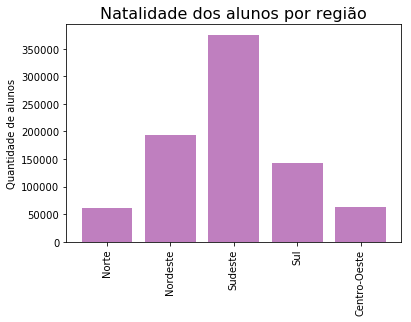

In [32]:
regiao_nasc = [["Norte", 0], ["Nordeste", 0], ["Sudeste", 0], ["Sul", 0], ["Centro-Oeste", 0]]

for estado in df.groupBy("CO_UF_NASCIMENTO").count().orderBy("count", ascending=False).collect():
    if estado[0] is None:  
        pass
    else:
        if [41, 42, 43].count(int(float(estado[0]))) != 0:
            regiao_nasc[3][1] += estado[1]
        elif [50, 51, 52, 53].count(int(float(estado[0]))) != 0:
            regiao_nasc[4][1] += estado[1]
        elif [31, 32, 33, 35].count(int(float(estado[0]))) != 0:
            regiao_nasc[2][1]+= estado[1]
        elif [11, 12, 13, 14, 15, 16, 17].count(int(float(estado[0]))) != 0:
            regiao_nasc[0][1]+= estado[1]
        else:
            regiao_nasc[1][1]+= estado[1]

gerar_grafico(regiao_nasc, "Natalidade dos alunos por região")

In [33]:
# 10 instituições de ensino com maior número de alunos nascidos na região Sudeste

spark.sql("select distinct NO_IES as Instituicao_Ensino, count(NO_IES) as Qtde_Alunos_Sudeste from dados \
        where (CO_UF_NASCIMENTO=31 or CO_UF_NASCIMENTO=32 or CO_UF_NASCIMENTO=33 or \
        CO_UF_NASCIMENTO=35) group by NO_IES order by Qtde_Alunos_Sudeste desc").show(10, truncate=False)

+---------------------------------------------------------+-------------------+
|Instituicao_Ensino                                       |Qtde_Alunos_Sudeste|
+---------------------------------------------------------+-------------------+
|UNIVERSIDADE ESTÁCIO DE SÁ                               |38569              |
|UNIVERSIDADE PITÁGORAS UNOPAR                            |13823              |
|CENTRO UNIVERSITÁRIO DAS FACULDADES METROPOLITANAS UNIDAS|8393               |
|UNIVERSIDADE ANHEMBI MORUMBI                             |7227               |
|UNIVERSIDADE PAULISTA                                    |6757               |
|UNIVERSIDADE FEDERAL FLUMINENSE                          |5827               |
|UNIVERSIDADE VEIGA DE ALMEIDA                            |5689               |
|UNIVERSIDADE DE SÃO PAULO                                |5446               |
|PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS         |5127               |
|CENTRO UNIVERSITÁRIO INTERNACIONAL     

In [34]:
# 10 instituições de ensino com maior número de alunos nascidos na região Sul

spark.sql("select distinct NO_IES as Instituicao_Ensino, count(NO_IES) as Qtde_Alunos_Sul from dados \
        where (CO_UF_NASCIMENTO=41 or CO_UF_NASCIMENTO=42 or CO_UF_NASCIMENTO=43) group by NO_IES order by Qtde_Alunos_Sul desc").show(10, truncate=False)

+--------------------------------------------+---------------+
|Instituicao_Ensino                          |Qtde_Alunos_Sul|
+--------------------------------------------+---------------+
|UNIVERSIDADE PITÁGORAS UNOPAR               |11126          |
|CENTRO UNIVERSITÁRIO INTERNACIONAL          |7436           |
|CENTRO UNIVERSITÁRIO LEONARDO DA VINCI      |5458           |
|UNIVERSIDADE LUTERANA DO BRASIL             |4404           |
|CENTRO UNIVERSITÁRIO DE MARINGÁ - UNICESUMAR|4016           |
|UNIVERSIDADE DE CAXIAS DO SUL               |3993           |
|PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ  |3411           |
|UNIVERSIDADE PARANAENSE                     |2983           |
|UNIVERSIDADE FEDERAL DE SANTA CATARINA      |2827           |
|UNIVERSIDADE TECNOLÓGICA FEDERAL DO PARANÁ  |2413           |
+--------------------------------------------+---------------+
only showing top 10 rows



In [35]:
# 10 instituições de ensino com maior número de alunos nascidos na região Centro-Oeste

spark.sql("select distinct NO_IES as Instituicao_Ensino, count(NO_IES) as Qtde_Alunos_CentroOeste from dados \
        where (CO_UF_NASCIMENTO=50 or CO_UF_NASCIMENTO=51 or CO_UF_NASCIMENTO=52 or \
        CO_UF_NASCIMENTO=53) group by NO_IES order by Qtde_Alunos_CentroOeste desc").show(10, truncate=False)

+------------------------------------------+-----------------------+
|Instituicao_Ensino                        |Qtde_Alunos_CentroOeste|
+------------------------------------------+-----------------------+
|UNIVERSIDADE PITÁGORAS UNOPAR             |4939                   |
|UNIVERSIDADE DE CUIABÁ                    |3692                   |
|PONTIFÍCIA UNIVERSIDADE CATÓLICA DE GOIÁS |2963                   |
|CENTRO UNIVERSITÁRIO DE BRASÍLIA          |2448                   |
|UNIVERSIDADE FEDERAL DE GOIÁS             |2319                   |
|UNIVERSIDADE ESTADUAL DE GOIÁS            |1893                   |
|CENTRO UNIVERSITÁRIO DE VÁRZEA GRANDE     |1454                   |
|UNIVERSIDADE DO ESTADO DE MATO GROSSO     |1444                   |
|UNIVERSIDADE FEDERAL DE MATO GROSSO DO SUL|1434                   |
|UNIVERSIDADE PAULISTA                     |1242                   |
+------------------------------------------+-----------------------+
only showing top 10 rows



In [36]:
# 10 instituições de ensino com maior número de alunos nascidos na região Norte

spark.sql("select distinct NO_IES as Instituicao_Ensino, count(NO_IES) as Qtde_Alunos_Norte from dados \
        where (CO_UF_NASCIMENTO=11 or CO_UF_NASCIMENTO=12 or CO_UF_NASCIMENTO=13 or \
        CO_UF_NASCIMENTO=14 or CO_UF_NASCIMENTO=15 or CO_UF_NASCIMENTO=16 or \
        CO_UF_NASCIMENTO=17) group by NO_IES order by Qtde_Alunos_Norte desc").show(10, truncate=False)

+----------------------------------------+-----------------+
|Instituicao_Ensino                      |Qtde_Alunos_Norte|
+----------------------------------------+-----------------+
|UNIVERSIDADE PITÁGORAS UNOPAR           |7385             |
|CENTRO UNIVERSITÁRIO DO NORTE           |5704             |
|UNIVERSIDADE FEDERAL DO AMAZONAS        |2753             |
|UNIVERSIDADE NILTON LINS                |2593             |
|FACULDADE DE MACAPÁ                     |1636             |
|CENTRO UNIVERSITÁRIO INTERNACIONAL      |1403             |
|FACULDADE BARÃO DO RIO BRANCO           |1351             |
|UNIVERSIDADE DO ESTADO DO AMAZONAS      |1167             |
|UNIVERSIDADE ESTÁCIO DE SÁ              |1133             |
|CENTRO UNIVERSITÁRIO ESTÁCIO DA AMAZÔNIA|1114             |
+----------------------------------------+-----------------+
only showing top 10 rows



In [37]:
# 10 instituições de ensino com maior número de alunos nascidos na região Nordeste

spark.sql("select distinct NO_IES as Instituicao_Ensino, count(NO_IES) as Qtde_Alunos_Nordeste from dados \
        where (CO_UF_NASCIMENTO=21 or CO_UF_NASCIMENTO=22 or CO_UF_NASCIMENTO=23 or \
        CO_UF_NASCIMENTO=24 or CO_UF_NASCIMENTO=25 or CO_UF_NASCIMENTO=26 or \
        CO_UF_NASCIMENTO=27 or CO_UF_NASCIMENTO=28 or CO_UF_NASCIMENTO=29) group by NO_IES order by Qtde_Alunos_Nordeste desc").show(10, truncate=False)

+-------------------------------------+--------------------+
|Instituicao_Ensino                   |Qtde_Alunos_Nordeste|
+-------------------------------------+--------------------+
|UNIVERSIDADE PITÁGORAS UNOPAR        |11749               |
|Centro Universitário Estácio do Ceará|7285                |
|UNIVERSIDADE ESTÁCIO DE SÁ           |6104                |
|UNIVERSIDADE POTIGUAR                |4814                |
|UNIVERSIDADE TIRADENTES              |4375                |
|UNIVERSIDADE SALVADOR                |4296                |
|UNIVERSIDADE FEDERAL DE PERNAMBUCO   |3361                |
|UNIVERSIDADE FEDERAL DE SERGIPE      |3020                |
|UNIVERSIDADE DO CEUMA - UNICEUMA     |2950                |
|UNIVERSIDADE DE FORTALEZA            |2770                |
+-------------------------------------+--------------------+
only showing top 10 rows



### Formas de ingresso e benefícios para alunos

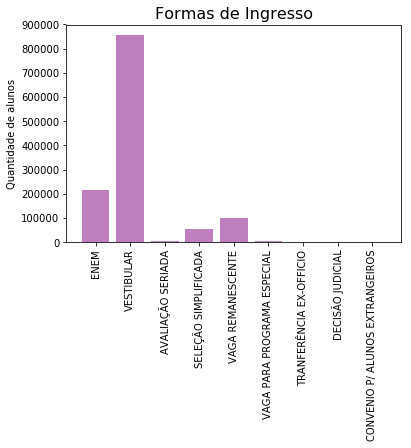

In [38]:
# Formas de ingresso

forma_ingresso = [["IN_ING_ENEM", "ENEM"], 
                  ["IN_ING_VESTIBULAR", "VESTIBULAR"], 
                  ["IN_ING_AVALIACAO_SERIADA", "AVALIAÇÃO SERIADA"], 
                  ["IN_ING_SELECAO_SIMPLIFICADA", "SELEÇÃO SIMPLIFICADA"],
                  ["IN_ING_SELECAO_VAGA_REMANESC", "VAGA REMANESCENTE"],
                  ["IN_ING_SELECAO_VAGA_PROG_ESPEC", "VAGA PARA PROGRAMA ESPECIAL"],
                  ["IN_ING_TRANSF_EXOFFICIO", "TRANFERÊNCIA EX-OFFICIO"],
                  ["IN_ING_DECISAO_JUDICIAL", "DECISÃO JUDICIAL"],
                  ["IN_ING_CONVENIO_PECG", "CONVENIO P/ ALUNOS EXTRANGEIROS"]]

gerar_grafico(agrupa_valores(forma_ingresso)[0], "Formas de Ingresso")


--------------------------------------------------

Total de cotas: 85662

--------------------------------------------------


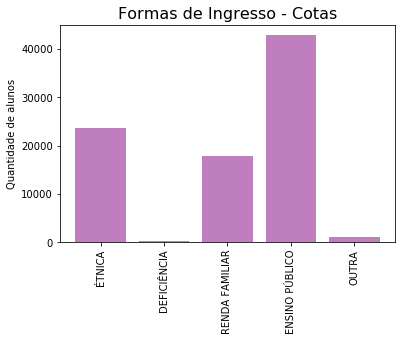

In [39]:
# Forma de ingresso por cotas

forma_ingresso_cotas = [["IN_RESERVA_ETNICO", "ÉTNICA"],
                        ["IN_RESERVA_DEFICIENCIA", "DEFICIÊNCIA"],
                        ["IN_RESERVA_RENDA_FAMILIAR", "RENDA FAMILIAR"],
                        ["IN_RESERVA_ENSINO_PUBLICO", "ENSINO PÚBLICO"], 
                        ["IN_RESERVA_OUTRA", "OUTRA"]]

valores = agrupa_valores(forma_ingresso_cotas)

separador(); print("\nTotal de cotas:", valores[1]); separador()

gerar_grafico(valores[0], "Formas de Ingresso - Cotas")


--------------------------------------------------

Total de financiamentos estudantis reembolsáveis:  253814
Total de financiamentos estudantis não reembolsáveis:  186191
Total de alunos beneficiados (um aluno pode receber mais de um tipo de financiamento):  395768

--------------------------------------------------


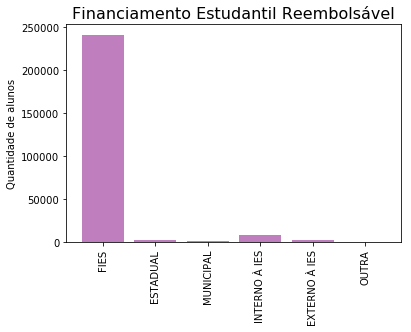

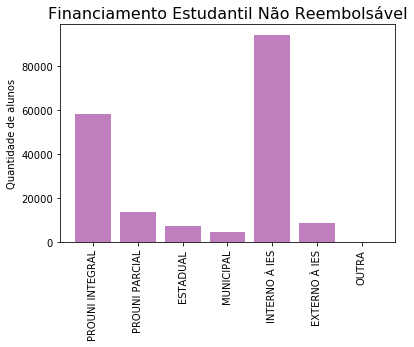

In [40]:
# Financiamentos estudantis reembolsáveis e não reembolsáveis

f_estudantil_reem = [["IN_FIN_REEMB_FIES", "FIES"],
                            ["IN_FIN_REEMB_ESTADUAL", "ESTADUAL"],
                            ["IN_FIN_REEMB_MUNICIPAL", "MUNICIPAL"],
                            ["IN_FIN_REEMB_PROG_IES", "INTERNO À IES"],
                            ["IN_FIN_REEMB_ENT_EXTERNA", "EXTERNO À IES"],
                            ["IN_FIN_REEMB_OUTRA", "OUTRA"]]

f_estudantil_n_reem = [["IN_FIN_NAOREEMB_PROUNI_INTEGR", "PROUNI INTEGRAL"],
                            ["IN_FIN_NAOREEMB_PROUNI_PARCIAL", "PROUNI PARCIAL"],
                            ["IN_FIN_NAOREEMB_ESTADUAL", "ESTADUAL"],
                            ["IN_FIN_NAOREEMB_MUNICIPAL", "MUNICIPAL"],
                            ["IN_FIN_NAOREEMB_PROG_IES", "INTERNO À IES"],
                            ["IN_FIN_NAOREEMB_ENT_EXTERNA", "EXTERNO À IES"],
                            ["IN_FIN_NAOREEMB_OUTRA", "OUTRA"]]

f_estudantil_reem_v = agrupa_valores(f_estudantil_reem)
f_estudantil_n_reem_v = agrupa_valores(f_estudantil_n_reem)

separador()
print("\nTotal de financiamentos estudantis reembolsáveis: ", f_estudantil_reem_v[1])
print("Total de financiamentos estudantis não reembolsáveis: ", f_estudantil_n_reem_v[1])
print("Total de alunos beneficiados (um aluno pode receber mais de um tipo de financiamento): ", 
      spark.sql("select count(_c0) as Alunos_beneficiados from dados where (IN_FINANC_ESTUDANTIL=1)").collect()[0][0])
separador()

gerar_grafico(f_estudantil_reem_v[0], "Financiamento Estudantil Reembolsável")
gerar_grafico(f_estudantil_n_reem_v[0], "Financiamento Estudantil Não Reembolsável")


--------------------------------------------------

Total de assistências estudantis: 155808
Total de alunos beneficiados (um aluno pode receber mais de um tipo de assistência):  123046

--------------------------------------------------


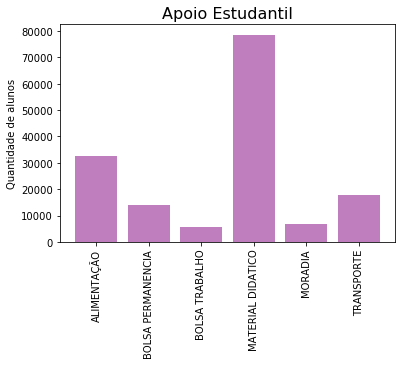

In [41]:
# Apoio estudantil

apoio_estudantil = [["IN_APOIO_ALIMENTACAO", "ALIMENTAÇÃO"],
                    ["IN_APOIO_BOLSA_PERMANENCIA", "BOLSA PERMANENCIA"],
                    ["IN_APOIO_BOLSA_TRABALHO", "BOLSA TRABALHO"],
                    ["IN_APOIO_MATERIAL_DIDATICO", "MATERIAL DIDATICO"],
                    ["IN_APOIO_MORADIA", "MORADIA"],
                    ["IN_APOIO_TRANSPORTE", "TRANSPORTE"]]

valores = agrupa_valores(apoio_estudantil)

separador()
print("\nTotal de assistências estudantis:", valores[1])
print("Total de alunos beneficiados (um aluno pode receber mais de um tipo de assistência): ", 
     spark.sql("select count(_c0) as Alunos_beneficiados_apoio from dados where (IN_APOIO_SOCIAL=1 or \
            IN_APOIO_ALIMENTACAO=1 or IN_APOIO_BOLSA_PERMANENCIA=1 or IN_APOIO_BOLSA_TRABALHO=1 or \
            IN_APOIO_MATERIAL_DIDATICO=1 or IN_APOIO_MORADIA=1 or IN_APOIO_TRANSPORTE=1)").collect()[0][0])
separador()

gerar_grafico(valores[0], "Apoio Estudantil")


--------------------------------------------------

Total de complementos estudantis: 209461
Total de alunos beneficiados (um aluno pode receber mais de um tipo de complemento):  165076

--------------------------------------------------


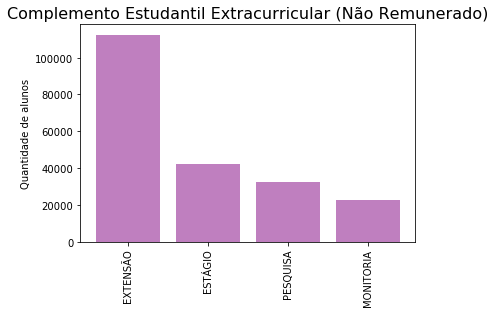

In [42]:
# Complemento estudantil

complemento_estudantil = [["IN_COMPL_EXTENSAO", "EXTENSÃO"],
                          ["IN_COMPL_ESTAGIO", "ESTÁGIO"],
                          ["IN_COMPL_PESQUISA", "PESQUISA"],
                          ["IN_COMPL_MONITORIA", "MONITORIA"]]

valores = agrupa_valores(complemento_estudantil)

separador()
print("\nTotal de complementos estudantis:", valores[1])
print("Total de alunos beneficiados (um aluno pode receber mais de um tipo de complemento): ", 
     spark.sql("select count(_c0) as Alunos_beneficiados_complemento from dados where (IN_COMPL_ESTAGIO=1 or \
            IN_COMPL_EXTENSAO=1 or IN_COMPL_MONITORIA=1 or IN_COMPL_PESQUISA=1)").collect()[0][0])
separador()
gerar_grafico(valores[0], "Complemento Estudantil Extracurricular (Não Remunerado)")


--------------------------------------------------

Total de bolsas estudantis:  70298
Total de alunos beneficiados (um aluno pode receber mais de um tipo de bolsa):  64494

--------------------------------------------------


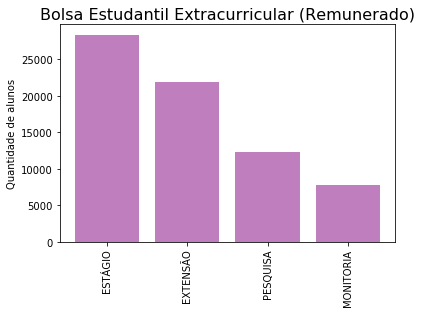

In [43]:
# Bolsa estudantil

bolsa_estudantil = [["IN_BOLSA_ESTAGIO", "ESTÁGIO"],
                    ["IN_BOLSA_EXTENSAO", "EXTENSÃO"],
                    ["IN_BOLSA_PESQUISA", "PESQUISA"],
                    ["IN_BOLSA_MONITORIA", "MONITORIA"]]

valores = agrupa_valores(bolsa_estudantil)

separador(); 
print("\nTotal de bolsas estudantis: ",valores[1])
print("Total de alunos beneficiados (um aluno pode receber mais de um tipo de bolsa): ", 
                  spark.sql("select count(_c0) as Alunos_beneficiados_bolsa from dados where (IN_BOLSA_ESTAGIO=1 or IN_BOLSA_EXTENSAO=1 or \
            IN_BOLSA_MONITORIA=1 or IN_BOLSA_PESQUISA=1)").collect()[0][0])
separador()
gerar_grafico(valores[0], "Bolsa Estudantil Extracurricular (Remunerado)")

### Alunos com algum tipo de deficiência

In [44]:
# Total alunos especiais

spark.sql("select count(_c0) as Total_Alunos from dados \
        where (IN_DEF_AUDITIVA=1 or IN_DEF_FISICA=1 or IN_DEF_INTELECTUAL=1 or \
        IN_DEF_MULTIPLA=1 or IN_DEF_SURDEZ=1 or IN_DEF_SURDOCEGUEIRA=1 or \
        IN_DEF_BAIXA_VISAO=1 or IN_DEF_CEGUEIRA=1 or IN_DEF_SUPERDOTACAO=1 or \
        IN_ALUNO_DEF_TGD_SUPER=1 or IN_TGD_AUTISMO_INFANTIL=1 or IN_TGD_SINDROME_ASPERGER=1 or \
        IN_TGD_SINDROME_RETT=1 or IN_TGD_TRANSTOR_DESINTEGRATIVO=1)").show()

+------------+
|Total_Alunos|
+------------+
|        5026|
+------------+



In [45]:
# Alunos especiais por categoria administrativa

spark.sql("select distinct DS_CATEGORIA_ADMINISTRATIVA as Categoria_Adm, count(DS_CATEGORIA_ADMINISTRATIVA) as Qtde_Alunos_Especiais from dados \
        where (IN_DEF_AUDITIVA=1 or IN_DEF_FISICA=1 or IN_DEF_INTELECTUAL=1 or \
        IN_DEF_MULTIPLA=1 or IN_DEF_SURDEZ=1 or IN_DEF_SURDOCEGUEIRA=1 or \
        IN_DEF_BAIXA_VISAO=1 or IN_DEF_CEGUEIRA=1 or IN_DEF_SUPERDOTACAO=1 or \
        IN_ALUNO_DEF_TGD_SUPER=1 or IN_TGD_AUTISMO_INFANTIL=1 or IN_TGD_SINDROME_ASPERGER=1 or \
        IN_TGD_SINDROME_RETT=1 or IN_TGD_TRANSTOR_DESINTEGRATIVO=1) group by DS_CATEGORIA_ADMINISTRATIVA order by Qtde_Alunos_Especiais desc").show(truncate=False)

+---------------------------+---------------------+
|Categoria_Adm              |Qtde_Alunos_Especiais|
+---------------------------+---------------------+
|Privada com fins lucrativos|1673                 |
|Privada sem fins lucrativos|1505                 |
|Pública Federal            |1487                 |
|Pública Estadual           |332                  |
|Especial                   |20                   |
|Pública Municipal          |9                    |
+---------------------------+---------------------+



In [46]:
# Quantidade de alunos especiais por cor/raça

spark.sql("select distinct DS_COR_RACA_ALUNO as Cor_Raca, count(DS_COR_RACA_ALUNO) as Qtde_Alunos_Especiais from dados \
        where (IN_DEF_AUDITIVA=1 or IN_DEF_FISICA=1 or IN_DEF_INTELECTUAL=1 or \
        IN_DEF_MULTIPLA=1 or IN_DEF_SURDEZ=1 or IN_DEF_SURDOCEGUEIRA=1 or \
        IN_DEF_BAIXA_VISAO=1 or IN_DEF_CEGUEIRA=1 or IN_DEF_SUPERDOTACAO=1 or \
        IN_ALUNO_DEF_TGD_SUPER=1 or IN_TGD_AUTISMO_INFANTIL=1 or IN_TGD_SINDROME_ASPERGER=1 or \
        IN_TGD_SINDROME_RETT=1 or IN_TGD_TRANSTOR_DESINTEGRATIVO=1) group by DS_COR_RACA_ALUNO order by Qtde_Alunos_Especiais desc").show(truncate=False)

+--------------------------------+---------------------+
|Cor_Raca                        |Qtde_Alunos_Especiais|
+--------------------------------+---------------------+
|Branca                          |2128                 |
|Parda                           |1302                 |
|Aluno não quis declarar cor/raça|1004                 |
|Preta                           |434                  |
|Amarela                         |128                  |
|Indígena                        |30                   |
+--------------------------------+---------------------+



In [47]:
# Quantidade de alunos especiais por sexo

spark.sql("select distinct DS_SEXO_ALUNO as Sexo, count(DS_SEXO_ALUNO) as Qtde_Alunos_Especiais from dados \
        where (IN_DEF_AUDITIVA=1 or IN_DEF_FISICA=1 or IN_DEF_INTELECTUAL=1 or \
        IN_DEF_MULTIPLA=1 or IN_DEF_SURDEZ=1 or IN_DEF_SURDOCEGUEIRA=1 or \
        IN_DEF_BAIXA_VISAO=1 or IN_DEF_CEGUEIRA=1 or IN_DEF_SUPERDOTACAO=1 or \
        IN_ALUNO_DEF_TGD_SUPER=1 or IN_TGD_AUTISMO_INFANTIL=1 or IN_TGD_SINDROME_ASPERGER=1 or \
        IN_TGD_SINDROME_RETT=1 or IN_TGD_TRANSTOR_DESINTEGRATIVO=1) group by DS_SEXO_ALUNO order by Qtde_Alunos_Especiais desc").show(truncate=False)

+---------+---------------------+
|Sexo     |Qtde_Alunos_Especiais|
+---------+---------------------+
|Masculino|2598                 |
|Feminino |2428                 |
+---------+---------------------+



In [48]:
# Quantidade de alunos especiais por modalidade de ensino

spark.sql("select distinct DS_MODALIDADE_ENSINO as Modalidade_Ensino, count(DS_MODALIDADE_ENSINO) as Qtde_Alunos_Especiais from dados \
        where (IN_DEF_AUDITIVA=1 or IN_DEF_FISICA=1 or IN_DEF_INTELECTUAL=1 or \
        IN_DEF_MULTIPLA=1 or IN_DEF_SURDEZ=1 or IN_DEF_SURDOCEGUEIRA=1 or \
        IN_DEF_BAIXA_VISAO=1 or IN_DEF_CEGUEIRA=1 or IN_DEF_SUPERDOTACAO=1 or \
        IN_ALUNO_DEF_TGD_SUPER=1 or IN_TGD_AUTISMO_INFANTIL=1 or IN_TGD_SINDROME_ASPERGER=1 or \
        IN_TGD_SINDROME_RETT=1 or IN_TGD_TRANSTOR_DESINTEGRATIVO=1) group by DS_MODALIDADE_ENSINO order by Qtde_Alunos_Especiais desc").show(truncate=False)

+-----------------+---------------------+
|Modalidade_Ensino|Qtde_Alunos_Especiais|
+-----------------+---------------------+
|Presencial       |4143                 |
|Curso a distância|883                  |
+-----------------+---------------------+



In [49]:
# 10 Instituições de Ensino com mais alunos especiais matriculados

spark.sql("select distinct NO_IES as Instituicao_Ensino, count(NO_IES) as Qtde_Alunos_Especiais from dados \
        where (IN_DEF_AUDITIVA=1 or IN_DEF_FISICA=1 or IN_DEF_INTELECTUAL=1 or \
        IN_DEF_MULTIPLA=1 or IN_DEF_SURDEZ=1 or IN_DEF_SURDOCEGUEIRA=1 or \
        IN_DEF_BAIXA_VISAO=1 or IN_DEF_CEGUEIRA=1 or IN_DEF_SUPERDOTACAO=1 or \
        IN_ALUNO_DEF_TGD_SUPER=1 or IN_TGD_AUTISMO_INFANTIL=1 or IN_TGD_SINDROME_ASPERGER=1 or \
        IN_TGD_SINDROME_RETT=1 or IN_TGD_TRANSTOR_DESINTEGRATIVO=1) group by NO_IES order by Qtde_Alunos_Especiais desc").show(10, truncate=False)

+-----------------------------------------+---------------------+
|Instituicao_Ensino                       |Qtde_Alunos_Especiais|
+-----------------------------------------+---------------------+
|UNIVERSIDADE PAULISTA                    |272                  |
|UNIVERSIDADE FEDERAL DE VIÇOSA           |237                  |
|UNIVERSIDADE FEDERAL DA PARAÍBA          |190                  |
|UNIVERSIDADE ESTÁCIO DE SÁ               |168                  |
|UNIVERSIDADE NOVE DE JULHO               |162                  |
|UNIVERSIDADE ANHANGUERA - UNIDERP        |150                  |
|UNIVERSIDADE PITÁGORAS UNOPAR            |118                  |
|UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL|95                   |
|UNIVERSIDADE SALGADO DE OLIVEIRA         |80                   |
|UNIVERSIDADE FEDERAL DO PIAUÍ            |63                   |
+-----------------------------------------+---------------------+
only showing top 10 rows



### Dados de alunos cursando Técnologia em Sistemas Para Internet 

In [50]:
print('Quantidade de alunos matriculados no curso de Sistemas para Internet:', 
      df.filter(df["NO_CURSO"]=="SISTEMAS PARA INTERNET").count())  

Quantidade de alunos matriculados no curso de Sistemas para Internet: 1395


+---------+---------------+
|     Sexo|Qtde_Alunos_TSI|
+---------+---------------+
|Masculino|           1147|
| Feminino|            248|
+---------+---------------+



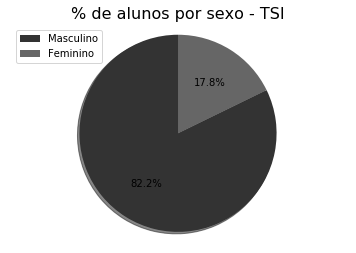

In [51]:
# Porcentagem de alunos matriculados no TSI por sexo

sexo_aluno = spark.sql("select distinct DS_SEXO_ALUNO as Sexo, count(DS_SEXO_ALUNO) as Qtde_Alunos_TSI from dados  \
    where NO_CURSO='SISTEMAS PARA INTERNET' group by DS_SEXO_ALUNO order by Qtde_Alunos_TSI desc")

sexo_aluno.show()

gerar_grafico(sexo_aluno.collect(), "% de alunos por sexo - TSI")

+-------------+---------------+
|        Turno|Qtde_Alunos_TSI|
+-------------+---------------+
|      Noturno|            723|
|Não aplicável|            376|
|   Vespertino|            138|
|     Matutino|            134|
|     Integral|             24|
+-------------+---------------+



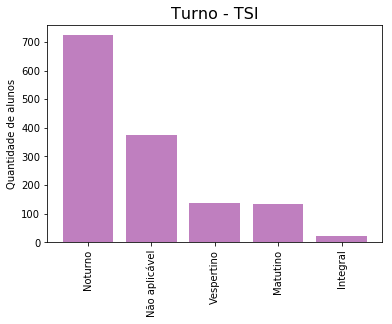

In [52]:
# Turno do curso ao qual o aluno matriculado no TSI está vinculado

turno = spark.sql("select distinct DS_TURNO_ALUNO as Turno, count(DS_TURNO_ALUNO) as Qtde_Alunos_TSI from dados  \
    where NO_CURSO='SISTEMAS PARA INTERNET' group by DS_TURNO_ALUNO order by Qtde_Alunos_TSI desc")

turno.show()

gerar_grafico(turno.collect(), "Turno - TSI")

+-----------------+---------------+
|Modalidade_ensino|Qtde_Alunos_TSI|
+-----------------+---------------+
|       Presencial|           1019|
|Curso a distância|            376|
+-----------------+---------------+



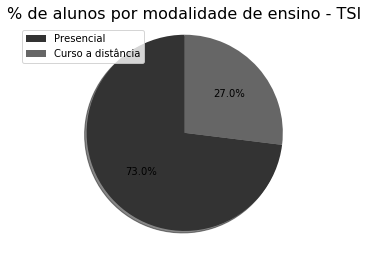

In [53]:
# Porcentagem de alunos matriculados no TSI por modalidade de ensino
mod_ensino = spark.sql("select distinct DS_MODALIDADE_ENSINO as Modalidade_ensino, count(DS_MODALIDADE_ENSINO) as Qtde_Alunos_TSI from dados  \
    where NO_CURSO='SISTEMAS PARA INTERNET' group by DS_MODALIDADE_ENSINO order by Qtde_Alunos_TSI desc")
mod_ensino.show()

gerar_grafico(mod_ensino.collect(), "% de alunos por modalidade de ensino - TSI")

In [54]:
# 10 Instituições de Ensino com mais alunos matriculados no curso de Sistemas Para Internet

spark.sql("select distinct NO_IES as Instituicao_Ensino, count(NO_IES) as Qtde_Alunos_TSI from dados \
        where NO_CURSO='SISTEMAS PARA INTERNET' group by NO_IES order by Qtde_Alunos_TSI desc").show(10,truncate=False)

+-------------------------------------------------------------------------+---------------+
|Instituicao_Ensino                                                       |Qtde_Alunos_TSI|
+-------------------------------------------------------------------------+---------------+
|INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE MATO GROSSO       |247            |
|INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE MATO GROSSO DO SUL|89             |
|INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA SUL-RIO-GRANDENSE    |67             |
|UNIVERSIDADE NOVE DE JULHO                                               |54             |
|CENTRO UNIVERSITÁRIO DE MARINGÁ - UNICESUMAR                             |50             |
|INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA  DA PARAÍBA          |44             |
|UNIVERSIDADE DO SUL DE SANTA CATARINA                                    |36             |
|UNIVERSIDADE TECNOLÓGICA FEDERAL DO PARANÁ                               |34   

### Dados dos alunos naturais de Barbacena/MG
Código da cidade de Barbacena: __[3105608](http://www.asstecnologia.com.br/blog/?p=1496)__

In [55]:
print('Quantidade de alunos naturais de Barbacena/MG:', 
      df.filter(df["CO_MUNICIPIO_NASCIMENTO"]==3105608).count())  

Quantidade de alunos naturais de Barbacena/MG: 791


+---------+-----------+
|     Sexo|Qtde_Alunos|
+---------+-----------+
| Feminino|        454|
|Masculino|        337|
+---------+-----------+



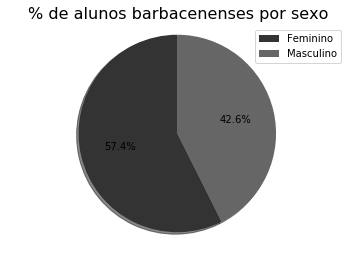

In [56]:
# Distribuição de Barbacenenses por sexo

sexo_aluno = spark.sql("select distinct DS_SEXO_ALUNO as Sexo, count(DS_SEXO_ALUNO) as Qtde_Alunos from dados  \
    where CO_MUNICIPIO_NASCIMENTO=3105608 group by DS_SEXO_ALUNO")
sexo_aluno.show()

gerar_grafico(sexo_aluno.collect(), "% de alunos barbacenenses por sexo")

+--------------------------------+-----------+
|Cor_Raca                        |Qtde_Alunos|
+--------------------------------+-----------+
|Branca                          |438        |
|Parda                           |155        |
|Aluno não quis declarar cor/raça|148        |
|Preta                           |36         |
|Amarela                         |14         |
+--------------------------------+-----------+



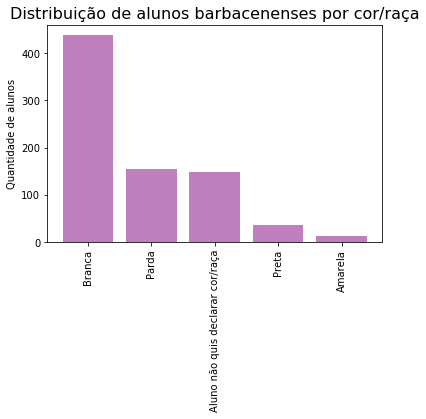

In [57]:
# Distribuição de barbacenenses por cor/raça

cor_raca = spark.sql("select distinct DS_COR_RACA_ALUNO as Cor_Raca, count(DS_COR_RACA_ALUNO) as Qtde_Alunos from dados  \
    where CO_MUNICIPIO_NASCIMENTO=3105608 group by DS_COR_RACA_ALUNO order by Qtde_Alunos desc")
cor_raca.show(truncate=False)

gerar_grafico(cor_raca.collect(), "Distribuição de alunos barbacenenses por cor/raça")

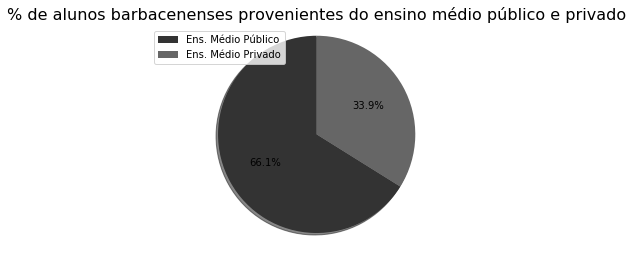

In [58]:
# Quantidade de alunos barbacenenses provenientes do ensino médio público e privado

tipo_escola = spark.sql("select distinct CO_TIPO_ESCOLA_ENS_MEDIO as Tipo_Escola, count(CO_TIPO_ESCOLA_ENS_MEDIO) as Qtde_alunos from dados  \
    where CO_MUNICIPIO_NASCIMENTO=3105608 group by CO_TIPO_ESCOLA_ENS_MEDIO ")

dados = []

for tipo in tipo_escola.collect():
    if tipo[0][0] == '1':
        dados.append(['Ens. Médio Público', tipo_escola.collect()[0][1]])
    else:
        dados.append(['Ens. Médio Privado', tipo_escola.collect()[1][1]])

gerar_grafico(dados, "% de alunos barbacenenses provenientes do ensino médio público e privado")

+---------------------------+-----------+
|Tipo_Escola                |Qtde_alunos|
+---------------------------+-----------+
|Privada sem fins lucrativos|328        |
|Privada com fins lucrativos|238        |
|Pública Federal            |175        |
|Pública Estadual           |48         |
|Pública Municipal          |1          |
|Especial                   |1          |
+---------------------------+-----------+



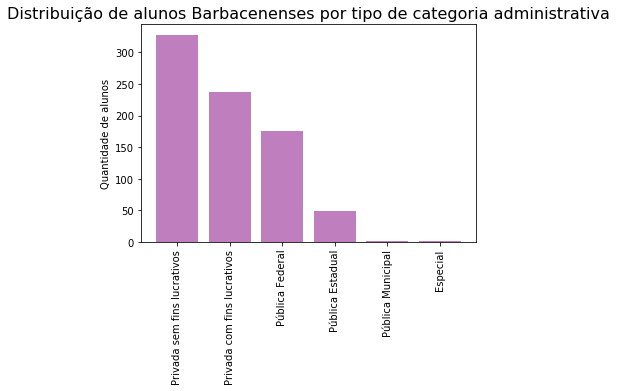

In [59]:
# Distribuição de alunos Barbacenenses por tipo de categoria administrativa

cat_adm = spark.sql("select distinct DS_CATEGORIA_ADMINISTRATIVA as Tipo_Escola, count(DS_CATEGORIA_ADMINISTRATIVA) as Qtde_alunos from dados  \
    where CO_MUNICIPIO_NASCIMENTO=3105608 group by DS_CATEGORIA_ADMINISTRATIVA order by Qtde_alunos desc")
cat_adm.show(truncate=False)

gerar_grafico(cat_adm.collect(), "Distribuição de alunos Barbacenenses por tipo de categoria administrativa")

+---------------------------------------------------+-----------+
|Tipo_Organizacao                                   |Qtde_alunos|
+---------------------------------------------------+-----------+
|Universidade                                       |421        |
|Faculdade                                          |218        |
|Centro Universitário                               |85         |
|Instituto Federal de Educação, Ciência e Tecnologia|66         |
|Centro Federal de Educação Tecnológica             |1          |
+---------------------------------------------------+-----------+



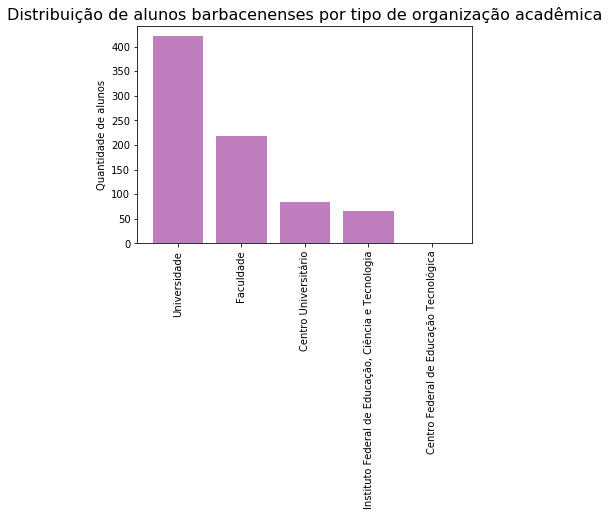

In [60]:
# Distribuição de alunos barbacenenses por tipo de organização acadêmica

org_academica = spark.sql("select distinct DS_ORGANIZACAO_ACADEMICA as Tipo_Organizacao, count(DS_ORGANIZACAO_ACADEMICA) as Qtde_alunos from dados  \
    where CO_MUNICIPIO_NASCIMENTO=3105608 group by DS_ORGANIZACAO_ACADEMICA order by Qtde_alunos desc")
org_academica.show(truncate=False)

gerar_grafico(org_academica.collect(), "Distribuição de alunos barbacenenses por tipo de organização acadêmica")

In [61]:
# 15 instituições de ensino com mais alunos barbacenenses matriculados

spark.sql("select distinct NO_IES as Instituicao_Ensino, count(NO_IES) as Qtde_Alunos from dados  \
    where CO_MUNICIPIO_NASCIMENTO=3105608 group by NO_IES order by Qtde_Alunos desc").show(15, truncate=False)

+------------------------------------------------------------------------------+-----------+
|Instituicao_Ensino                                                            |Qtde_Alunos|
+------------------------------------------------------------------------------+-----------+
|UNIVERSIDADE PRESIDENTE ANTÔNIO CARLOS                                        |139        |
|CENTRO DE ESTUDOS SUPERIORES APRENDIZ                                         |87         |
|INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DO SUDESTE DE MINAS GERAIS|62         |
|UNIVERSIDADE DE UBERABA                                                       |49         |
|UNIVERSIDADE FEDERAL DE SÃO JOÃO DEL REI                                      |46         |
|UNIVERSIDADE DO ESTADO DE MINAS GERAIS                                        |43         |
|UNIVERSIDADE FEDERAL DE JUIZ DE FORA                                          |34         |
|CENTRO UNIVERSITÁRIO INTERNACIONAL                                   

In [62]:
# 15 cursos com mais alunos barbacenenses matriculados

spark.sql("select distinct NO_CURSO as Nome_Curso, count(NO_CURSO) as Quantidade_Alunos from dados  \
    where CO_MUNICIPIO_NASCIMENTO=3105608 group by NO_CURSO order by Quantidade_Alunos desc").show(15, truncate=False)

+--------------------------+-----------------+
|Nome_Curso                |Quantidade_Alunos|
+--------------------------+-----------------+
|DIREITO                   |137              |
|ADMINISTRAÇÃO             |68               |
|PEDAGOGIA                 |49               |
|ENGENHARIA CIVIL          |42               |
|CIÊNCIAS CONTÁBEIS        |40               |
|ENGENHARIA DE PRODUÇÃO    |38               |
|PSICOLOGIA                |33               |
|EDUCAÇÃO FÍSICA           |33               |
|NUTRIÇÃO                  |22               |
|ENGENHARIA MECÂNICA       |21               |
|ENFERMAGEM                |21               |
|CIÊNCIAS SOCIAIS          |17               |
|FISIOTERAPIA              |13               |
|ARQUITETURA E URBANISMO   |11               |
|GESTÃO DE RECURSOS HUMANOS|10               |
+--------------------------+-----------------+
only showing top 15 rows

